In [89]:
import pandas as pd
train_set = pd.read_csv("train.csv")
train_set.head(10)


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


In [90]:
train_set.ADDRESS.value_counts()

Zirakpur,Chandigarh              509
Whitefield,Bangalore             230
Raj Nagar Extension,Ghaziabad    215
Sector-137 Noida,Noida           139
New Town,Kolkata                 131
                                ... 
Sharda Nagar,Kanpur                1
Duggirala,Tenali                   1
Ramanathapuram,Palakkad            1
Mondal Ganthi,Kolkata              1
Bhensali,Bharuch                   1
Name: ADDRESS, Length: 6899, dtype: int64

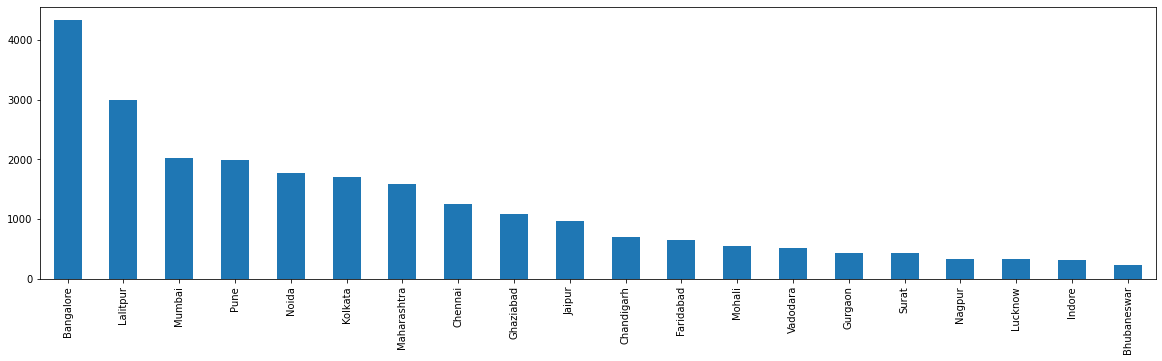

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20 ,5))
train_set.ADDRESS = train_set.ADDRESS.apply(lambda x: x.split(',')[-1])
train_set.ADDRESS.value_counts()[:20].plot(kind='bar')
plt.show()


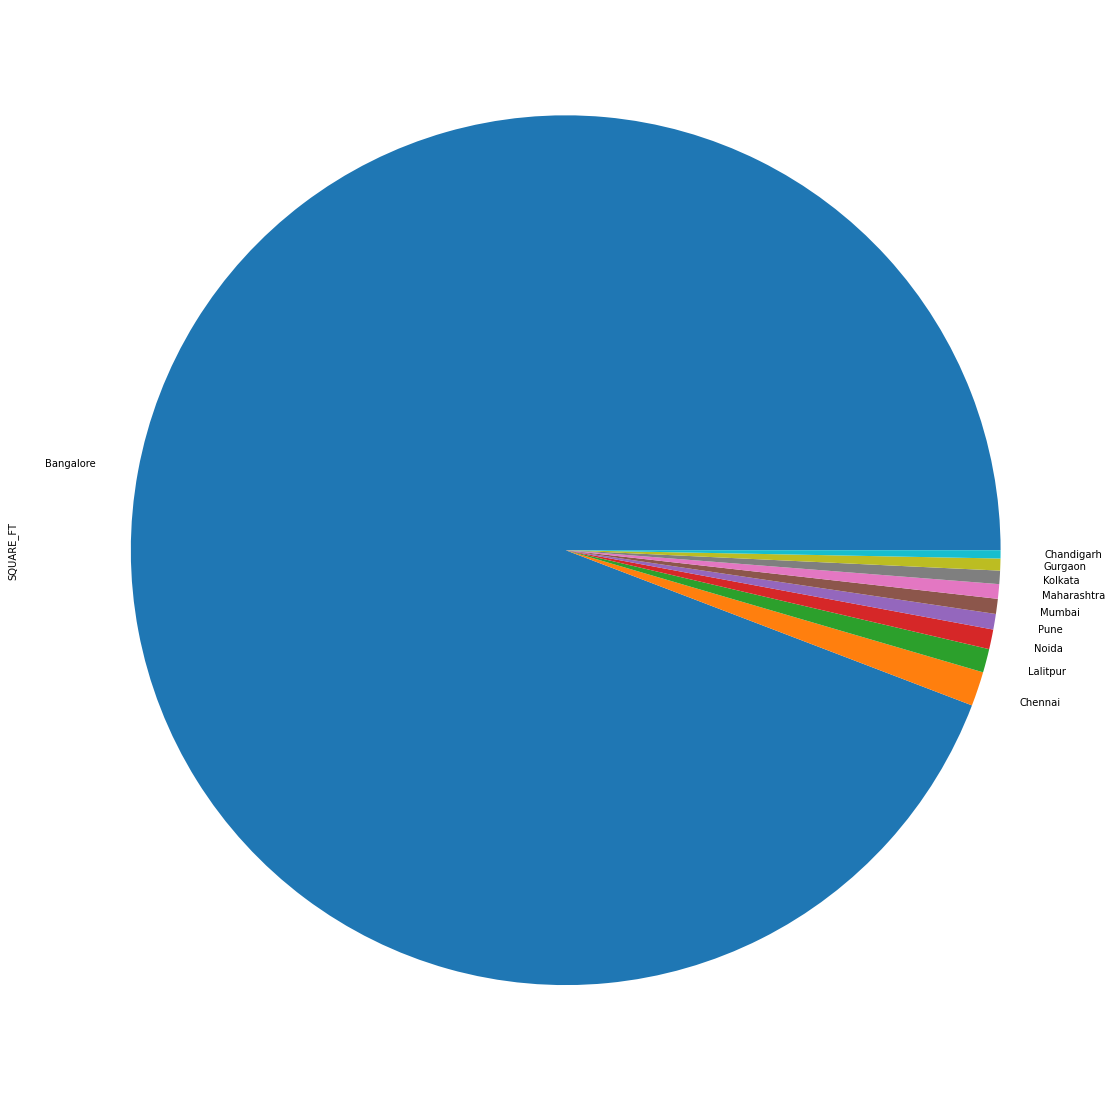

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20 ,20))
train_set.groupby(['ADDRESS']).sum().SQUARE_FT.nlargest(10).plot(kind='pie')
plt.show()

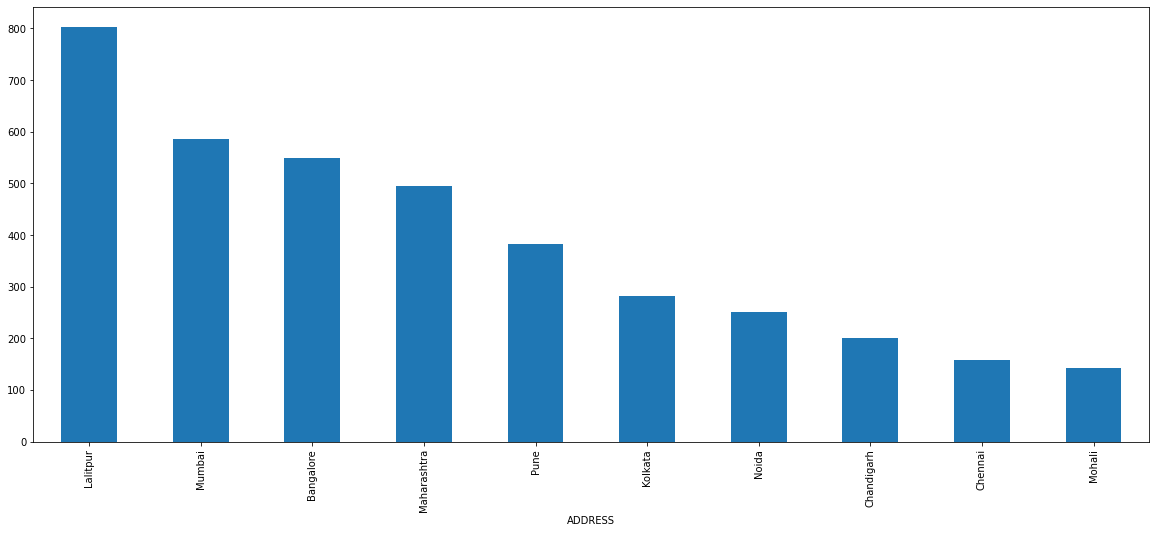

In [79]:
plt.figure(figsize=(20 ,8))
train_set.groupby(['ADDRESS']).sum().UNDER_CONSTRUCTION.nlargest(10).plot(kind='bar')
plt.show()

In [91]:
top_cities = train_set.ADDRESS.value_counts().nlargest(15).index
train_set.ADDRESS =train_set.ADDRESS.apply(lambda x: x if x in top_cities else 'Other')
train_set.ADDRESS.value_counts()



Other                            27190
Zirakpur,Chandigarh                509
Whitefield,Bangalore               230
Raj Nagar Extension,Ghaziabad      215
Sector-137 Noida,Noida             139
New Town,Kolkata                   131
Jagatpura,Jaipur                   120
Rajarhat,Kolkata                   113
Thanisandra,Bangalore              110
Noida Extension,Noida              107
Baner,Pune                         101
Sector 88 Faridabad,Faridabad      100
Sector-75 Noida,Noida               99
Sector 86 Faridabad,Faridabad       97
Ajmer Road,Jaipur                   96
Sector-150 Noida,Noida              94
Name: ADDRESS, dtype: int64

In [67]:
import pandas as pd
train_set = pd.read_csv("train.csv")
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [16]:
train_set.shape

(29451, 12)

In [78]:
import numpy as np
train_set.TARGET(PRICE_IN_LACS)=train_set.TARGET(PRICE_IN_LACS).astype(np.int64)
train_set.head(10)


SyntaxError: cannot assign to function call (<ipython-input-78-1a34a977b449>, line 2)

In [77]:
from sklearn import preprocessing

def label_encoder(train_set, column_name):
    label_encoder = preprocessing.LabelEncoder()

    train_set[column_name]= label_encoder.fit_transform(train_set[column_name])
    print(column_name)
    for i in range(len(train_set[column_name].unique())):
        print("For {} : {}".format(i, label_encoder.inverse_transform([i])))
    print('-'*10)
    print(train_set[column_name].value_counts())
    print('-'*10)
    
    return train_set[column_name], label_encoder
train_set['BHK_OR_RK'], label_encoder_posted_by = label_encoder(train_set, 'BHK_OR_RK')
train_set

BHK_OR_RK
For 0 : ['BHK']
For 1 : ['RK']
----------
0    29427
1       24
Name: BHK_OR_RK, dtype: int64
----------


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,Mysore,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,Kolkata,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,1,Agra,27.140626,78.043277,45.0
29447,2,0,0,2,0,769.230769,1,1,Vapi,39.945409,-86.150721,16.0
29448,1,0,0,2,0,1022.641509,1,1,Jaipur,26.928785,75.828002,27.1
29449,2,0,0,2,0,927.079009,1,1,Chennai,12.900150,80.227910,67.0


In [99]:
def label_encoder(df, column_name):
    label_encoder = preprocessing.LabelEncoder()

    df[column_name]= label_encoder.fit_transform(df[column_name])
    print(column_name)
    for i in range(len(df[column_name].unique())):
        print("For {} : {}".format(i, label_encoder.inverse_transform([i])))
    print('-'*10)
    print(df[column_name].value_counts())
    print('-'*10)
    
    return df[column_name], label_encoder


train_set['POSTED_BY'], label_encoder_posted_by = label_encoder(train_set, 'POSTED_BY')
train_set

POSTED_BY
For 0 : [0]
For 1 : [1]
For 2 : [2]
----------
1    18291
2    10538
0      622
Name: POSTED_BY, dtype: int64
----------


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,BHK,1300.236407,1,1,5,12.969910,77.597960,55.0
1,1,0,0,2,BHK,1275.000000,1,1,5,12.274538,76.644605,51.0
2,2,0,0,2,BHK,933.159722,1,1,5,12.778033,77.632191,43.0
3,2,0,1,2,BHK,929.921143,1,1,5,28.642300,77.344500,62.5
4,1,1,0,2,BHK,999.009247,0,1,3,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,BHK,2500.000000,1,1,5,27.140626,78.043277,45.0
29447,2,0,0,2,BHK,769.230769,1,1,5,39.945409,-86.150721,16.0
29448,1,0,0,2,BHK,1022.641509,1,1,0,26.928785,75.828002,27.1
29449,2,0,0,2,BHK,927.079009,1,1,5,12.900150,80.227910,67.0


In [93]:
train_set['BHK_NO.'].value_counts()

2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
20        4
10        4
15        4
9         3
12        3
17        1
11        1
13        1
Name: BHK_NO., dtype: int64

In [98]:

train_set['ADDRESS'], label_encoder_posted_by = label_encoder(train_set, 'ADDRESS')


train_set

ADDRESS
For 0 : [0]
For 1 : [1]
For 2 : [2]
For 3 : [3]
For 4 : [4]
For 5 : [5]
For 6 : [6]
For 7 : [7]
For 8 : [8]
For 9 : [9]
For 10 : [10]
For 11 : [11]
For 12 : [12]
For 13 : [13]
For 14 : [14]
For 15 : [15]
----------
5     27190
15      509
14      230
6       215
10      139
3       131
2       120
7       113
13      110
4       107
1       101
9       100
12       99
8        97
0        96
11       94
Name: ADDRESS, dtype: int64
----------


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,BHK,1300.236407,1,1,5,12.969910,77.597960,55.0
1,1,0,0,2,BHK,1275.000000,1,1,5,12.274538,76.644605,51.0
2,2,0,0,2,BHK,933.159722,1,1,5,12.778033,77.632191,43.0
3,2,0,1,2,BHK,929.921143,1,1,5,28.642300,77.344500,62.5
4,1,1,0,2,BHK,999.009247,0,1,3,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,BHK,2500.000000,1,1,5,27.140626,78.043277,45.0
29447,2,0,0,2,BHK,769.230769,1,1,5,39.945409,-86.150721,16.0
29448,1,0,0,2,BHK,1022.641509,1,1,0,26.928785,75.828002,27.1
29449,2,0,0,2,BHK,927.079009,1,1,5,12.900150,80.227910,67.0
